<a href="https://colab.research.google.com/github/hgstyler/SEM-Denoise-Project/blob/main/OpenCV_Denoise_Filter_07222022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Information**###
| Name | Magnification | Voltage || Name | Magnification | Voltage |
|:--------:|:--------:|:------:||:--------:|:--------:|:------:|
|src011|x30k|30kV||src021|x50k|30kV|
|src012|x50k|30kV||src022|x50k|20kV|
|src013|x100k|30kV||src023|x50k|10kV|

###**Module Load**###

In [11]:
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
import skimage
import numpy as np
from matplotlib import pyplot as plt

print(f'OpenCV version: {cv2.__version__}')
print(f'SK Image version: {skimage.__version__}')
print(f'Numpy version: {np.__version__}')

OpenCV version: 4.6.0
SK Image version: 0.18.3
Numpy version: 1.21.6


###**Image Variables Assignment**###

In [5]:
# Before excution, google drive mount should be connected

src011 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x30k_30kV_20220720.tif')
src012 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50000_30kV_20220720.tif')
src013 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x100k_30kV_20220720.tif')

src021 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_30kV_20220720.tif')
src022 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_20kV_20220721.tif')
src023 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_10kV_20220722.tif')

###**Original Image Data of Tin Balls**###

- Left: Magnification: x30k, x50k, x100k / Voltage: 30kV
- Right: Magnification: x50k / Voltage: 30kV, 20kV, 10kV

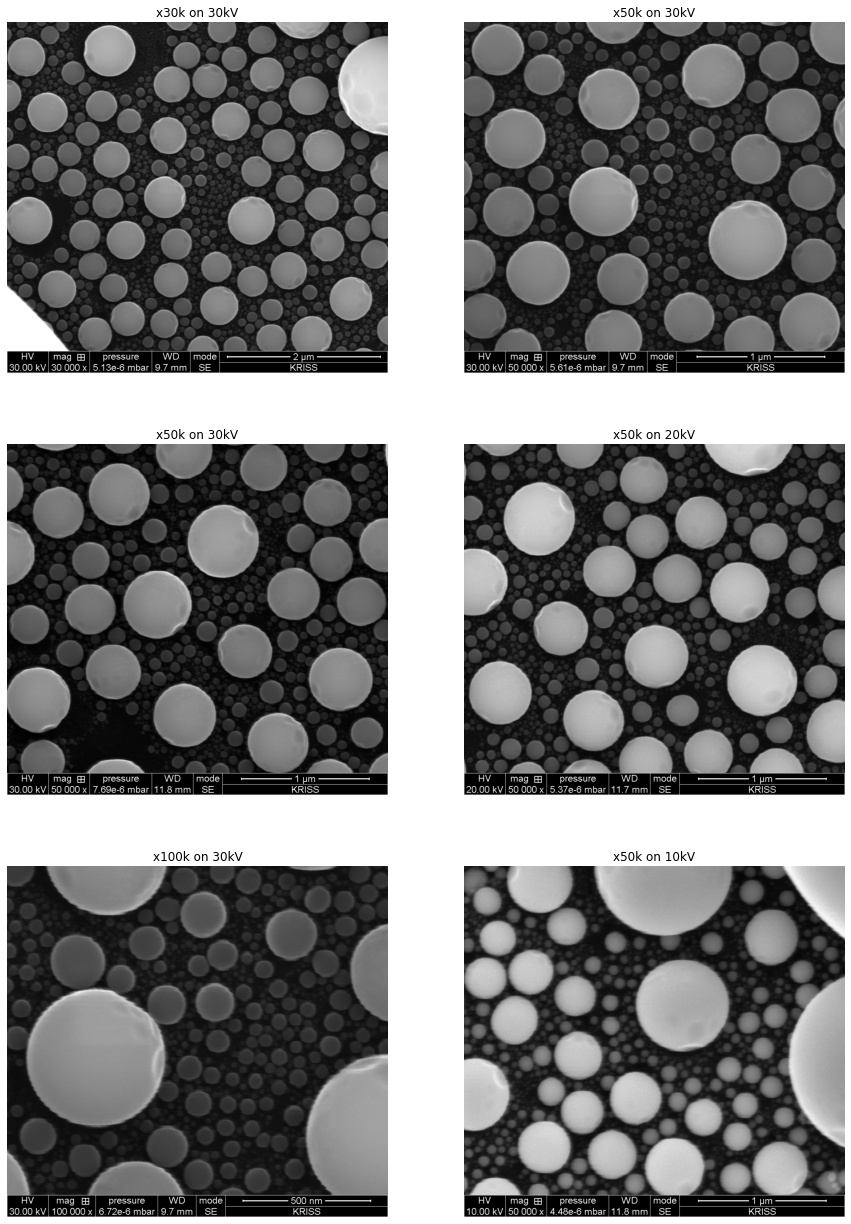

In [6]:
plt.figure(figsize=(15, 22))
r=3
c=2

raw_image = [src011, src021, src012, src022, src013, src023]
raw_image_title = ['x30k on 30kV', 'x50k on 30kV', 'x50k on 30kV', 'x50k on 20kV', 'x100k on 30kV', 'x50k on 10kV']

for i in range(6):
    plt.subplot(r,c,i+1)
    plt.imshow(raw_image[i])
    plt.title(raw_image_title[i])
    plt.axis("off")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/raw_images_20220722.tif')

###**Noise Generation, Noise reduction filter codes**###  

```Python
import cv2
from google.colab.patches import cv2_imshow
import skimage

img = skimage.util.random_noise(src012, mode="gaussian")
# mode = "gaussian" / "localvar" / "poisson" / "salt" / "pepper" / "s&p" / "speckle"
img = cv2.bilateralFilter(src012, -1, sigmaColorDev, sigmaSpaceDev)
# bilateral filter can implement only uint8 and float32.
img = cv2.GaussianBlur(src012, (0, 0), sigma)
```

###**Noise Filter used too less (x50k, x30kV)**###

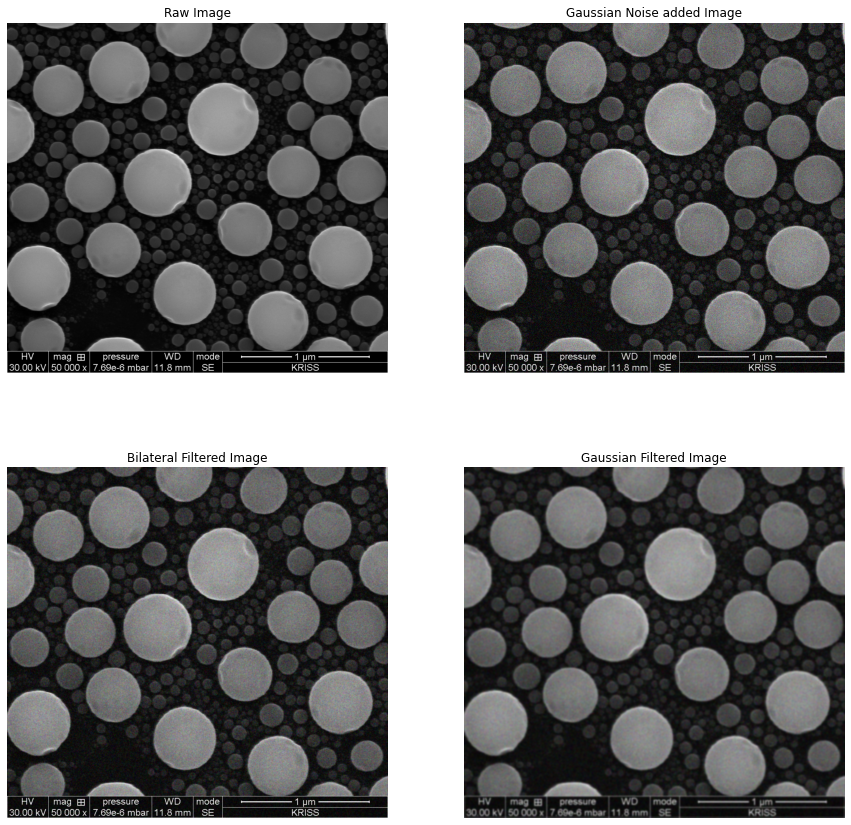

In [7]:
plt.figure(figsize=(15,15))
r=2
c=2

src012_noise_001 = skimage.util.random_noise(src012, mode="gaussian")
src012_noise_32 = src012_noise_001.astype('float32')
src012_noise_001_to_bilateral = cv2.bilateralFilter(src012_noise_32, -1, 1, 1)
src012_noise_001_to_gaussian = cv2.GaussianBlur(src012_noise_001, (0, 0), 2)

noise_image_001 = [src012, src012_noise_001, src012_noise_001_to_bilateral, src012_noise_001_to_gaussian]
noise_image_001_title = ["Raw Image", "Gaussian Noise added Image", "Bilateral Filtered Image", "Gaussian Filtered Image"]

for i in range(4):
    plt.subplot(r,c,i+1)
    plt.imshow(noise_image_001[i])
    plt.title(noise_image_001_title[i])
    plt.axis("off")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_less_images_20220722.tif')

###**Noise Filter used too much (x50k, x30kV)**###

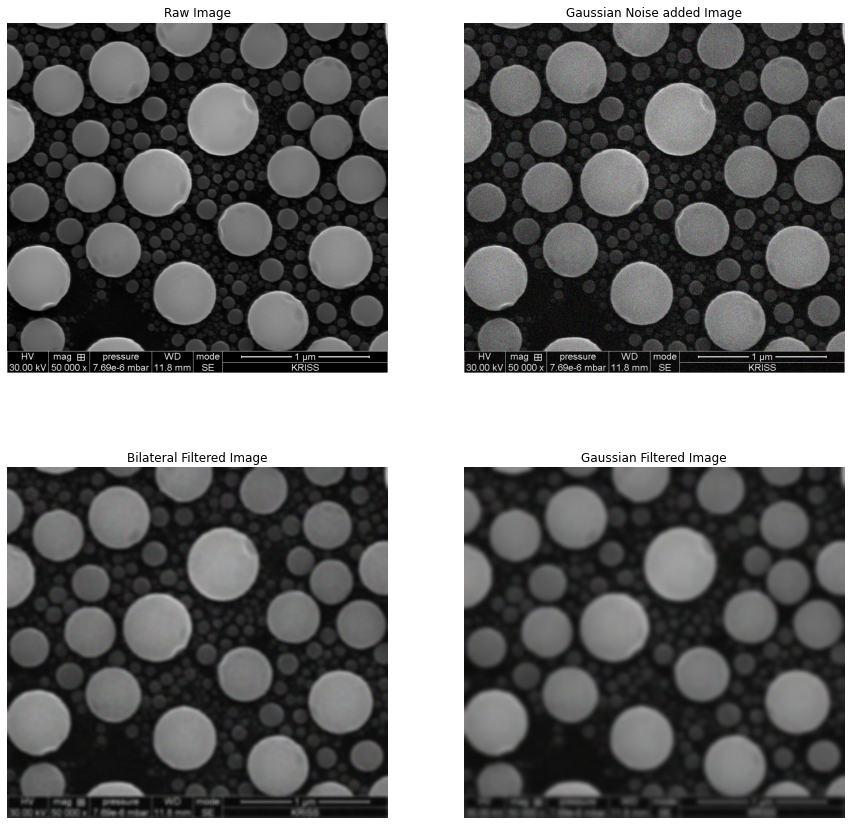

In [8]:
plt.figure(figsize=(15,15))
r=2
c=2

src012_noise_002_to_bilateral = cv2.bilateralFilter(src012_noise_32, -1, 5, 5)
src012_noise_002_to_gaussian = cv2.GaussianBlur(src012_noise_001, (0, 0), 6)

noise_image_002 = [src012, src012_noise_001, src012_noise_002_to_bilateral, src012_noise_002_to_gaussian]
noise_image_002_title = ["Raw Image", "Gaussian Noise added Image", "Bilateral Filtered Image", "Gaussian Filtered Image"]

for i in range(4):
    plt.subplot(r,c,i+1)
    plt.imshow(noise_image_002[i])
    plt.title(noise_image_002_title[i])
    plt.axis("off")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_much_images_20220722.tif')

###**Bilateral Filter: changing sigmaColor Dev. & sigmaSpace Dev. (x100k x30kV)**###

- Changing sigmaColor Dev. from 0 to 100 (100 means Gaussian filter)

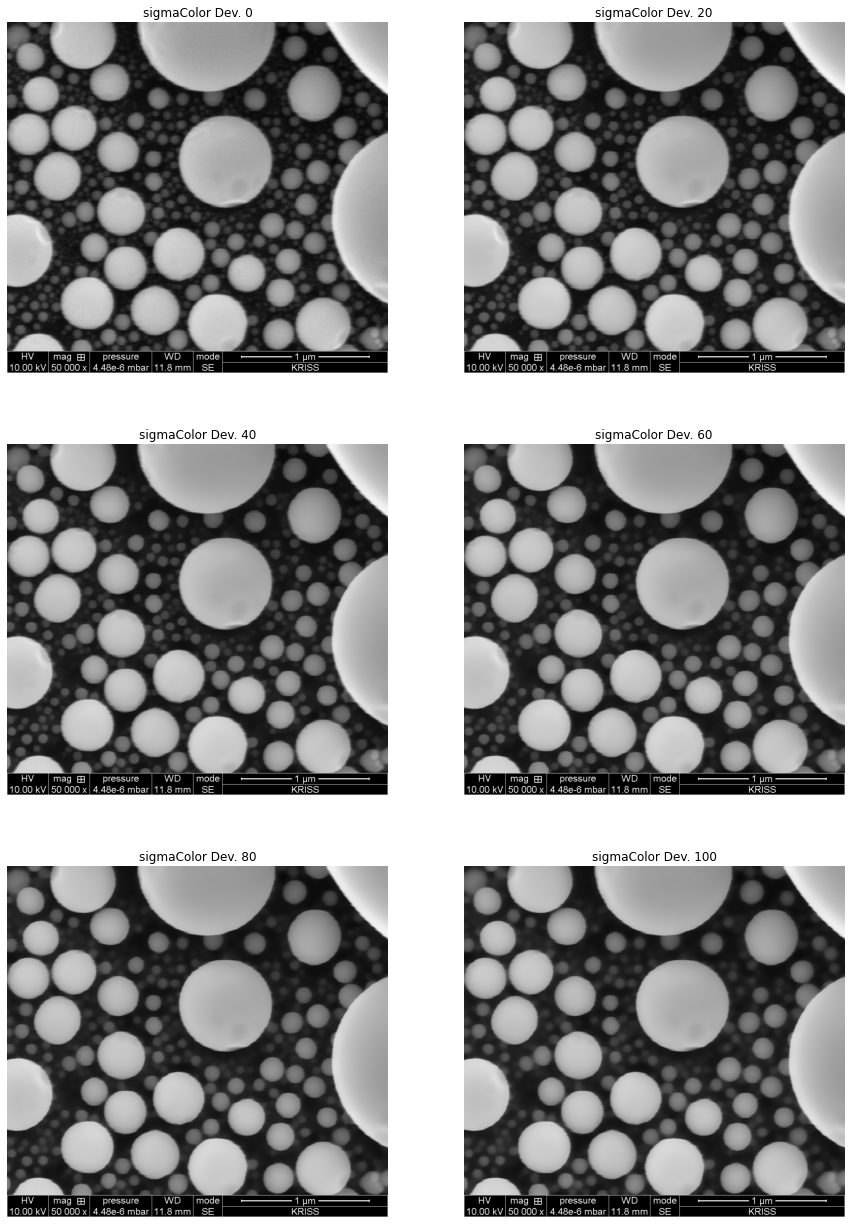

In [17]:
plt.figure(figsize=(15,22))
r=3
c=2
i=1

for sigmaColorDev in range(0, 120, 20):
    plt.subplot(r,c,i)
    src023_bilateral = cv2.bilateralFilter(src023, -1, sigmaColorDev, 10)
    plt.imshow(src023_bilateral)
    plt.title(f"sigmaColor Dev. {sigmaColorDev}")
    plt.axis("off")
    i += 1

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaColorDev_images_20220722.tif')

- Changing sigmaSpace Dev. from 0 to 100 (SigmaColor Dev fixed to 10)

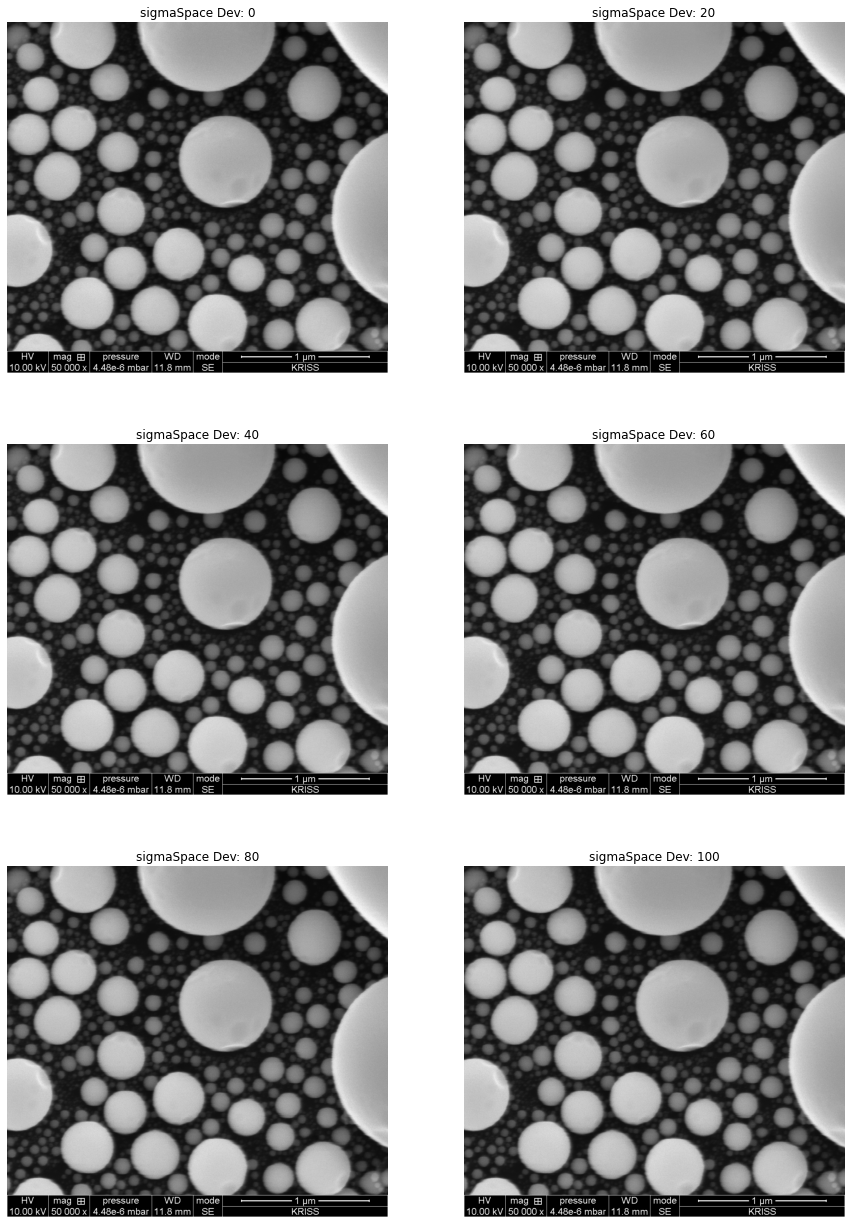

In [19]:
plt.figure(figsize=(15,22))
r=3
c=2
i=1

for sigmaSpaceDev in range(0, 120, 20):
    plt.subplot(r,c,i)
    src023_bilateral = cv2.bilateralFilter(src023, -1, 10, sigmaSpaceDev)
    plt.imshow(src023_bilateral)
    plt.title(f'sigmaSpace Dev: {sigmaSpaceDev}')
    plt.axis("off")
    i += 1

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaSpaceDev_images_20220722.tif')